In [2]:
import pandas as pd
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import random
import os
import numpy as np
from sklearn import metrics 

In [3]:
def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(0,14): # ignore 'ID'
        rmse = metrics.mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:14])
    return score

In [31]:
# 범주 내 데이터
normal_data_Y_01 = pd.read_csv("./normal_data/Y_01.csv")
normal_data_Y_02 = pd.read_csv("./normal_data/Y_02.csv")
normal_data_Y_03 = pd.read_csv("./normal_data/Y_03.csv")
normal_data_Y_04 = pd.read_csv("./normal_data/Y_04.csv")
normal_data_Y_05 = pd.read_csv("./normal_data/Y_05.csv")
normal_data_Y_06 = pd.read_csv("./normal_data/Y_06.csv")
normal_data_Y_07 = pd.read_csv("./normal_data/Y_07.csv")
normal_data_Y_08 = pd.read_csv("./normal_data/Y_08.csv")
normal_data_Y_09 = pd.read_csv("./normal_data/Y_09.csv")
normal_data_Y_10 = pd.read_csv("./normal_data/Y_10.csv")
normal_data_Y_11 = pd.read_csv("./normal_data/Y_11.csv")
normal_data_Y_12 = pd.read_csv("./normal_data/Y_12.csv")
normal_data_Y_13 = pd.read_csv("./normal_data/Y_13.csv")
# 범주 밖 데이터
abnormal_data_Y_01 = pd.read_csv("./abnormal_data/Y_01.csv")
abnormal_data_Y_02 = pd.read_csv("./abnormal_data/Y_02.csv")
abnormal_data_Y_03 = pd.read_csv("./abnormal_data/Y_03.csv")
abnormal_data_Y_04 = pd.read_csv("./abnormal_data/Y_04.csv")
abnormal_data_Y_05 = pd.read_csv("./abnormal_data/Y_05.csv")
abnormal_data_Y_06 = pd.read_csv("./abnormal_data/Y_06.csv")
abnormal_data_Y_07 = pd.read_csv("./abnormal_data/Y_07.csv")
abnormal_data_Y_08 = pd.read_csv("./abnormal_data/Y_08.csv")
abnormal_data_Y_09 = pd.read_csv("./abnormal_data/Y_09.csv")
abnormal_data_Y_10 = pd.read_csv("./abnormal_data/Y_10.csv")
abnormal_data_Y_11 = pd.read_csv("./abnormal_data/Y_11.csv")
abnormal_data_Y_12 = pd.read_csv("./abnormal_data/Y_12.csv")
abnormal_data_Y_13 = pd.read_csv("./abnormal_data/Y_13.csv")

In [ ]:
for i in range(1,57):
    col = "X_%02d"%i
    a = normal_data_Y_01[[col]]
    b = abnormal_data_Y_01[[col]]
    plt.title(col)
    print("파라색이 정상, 주황색이 비정상")
    plt.hist(a, bins=100, density=True, alpha=0.7, histtype='step')
    plt.hist(b, bins=50, density=True, alpha=0.5, histtype='stepfilled')
    print(pd.concat([a.describe(),b.describe()],axis=1))
    plt.show()

파라색이 test, 주황색이 train
               X_01          X_01
count  39608.000000  39607.000000
mean      68.396003     68.412040
std        2.663089      2.655983
min       53.209000     56.268000
25%       66.465000     66.465000
50%       68.504000     68.504000
75%       69.524000     69.524000
max       86.859000     84.820000


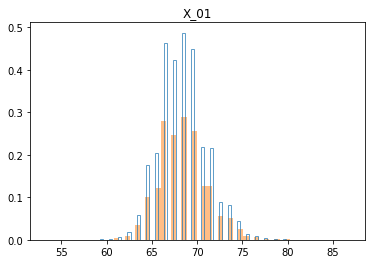

파라색이 test, 주황색이 train
               X_02          X_02
count  39608.000000  39607.000000
mean     103.320164    103.320166
std        0.000370      0.000372
min      103.320000    103.320000
25%      103.320000    103.320000
50%      103.320000    103.320000
75%      103.320000    103.320000
max      103.321000    103.321000


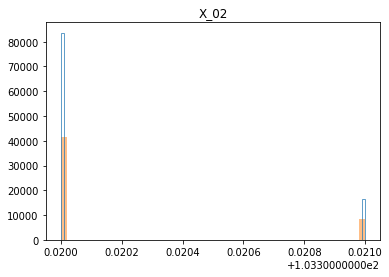

파라색이 test, 주황색이 train
               X_03          X_03
count  39608.000000  39607.000000
mean      68.837921     68.826354
std        5.205770      5.151167
min       55.570000     56.470000
25%       65.070000     65.070000
50%       67.270000     67.270000
75%       71.770000     71.770000
max       88.670000     89.170000


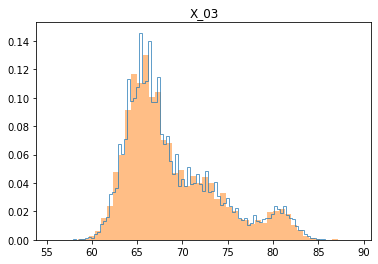

파라색이 test, 주황색이 train
          X_04     X_04
count  39608.0  39607.0
mean       1.0      1.0
std        0.0      0.0
min        1.0      1.0
25%        1.0      1.0
50%        1.0      1.0
75%        1.0      1.0
max        1.0      1.0


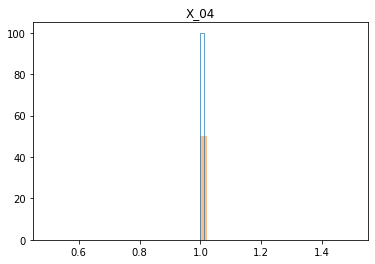

파라색이 test, 주황색이 train
               X_05          X_05
count  39608.000000  39607.000000
mean     102.337295    102.337203
std        0.547959      0.548353
min      101.734000    101.774000
25%      101.950000    101.949000
50%      102.007000    102.006000
75%      103.144000    103.144000
max      103.161000    103.160000


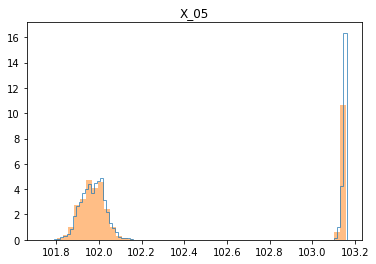

파라색이 test, 주황색이 train
               X_06          X_06
count  39608.000000  39607.000000
mean      70.584656     70.597211
std        2.250952      2.259820
min       61.726000     61.726000
25%       68.864000     68.864000
50%       69.884000     69.884000
75%       71.923000     71.923000
max       87.219000     87.219000


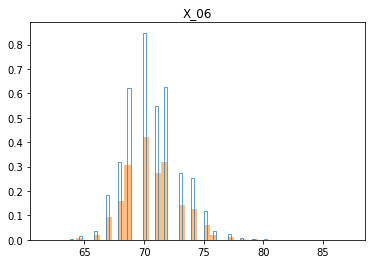

파라색이 test, 주황색이 train
               X_07          X_07
count  39608.000000  39607.000000
mean      29.465362     29.407490
std        7.869169      7.338204
min       13.390000     14.140000
25%       27.900000     27.890000
50%       28.840000     28.840000
75%       29.880000     29.870000
max      163.860000    163.860000


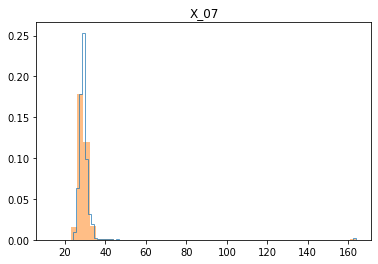

파라색이 test, 주황색이 train
               X_08          X_08
count  39608.000000  39607.000000
mean     163.372693    164.449320
std      219.287019    220.402444
min       28.590000     38.460000
25%      105.760000    105.990000
50%      115.040000    115.040000
75%      131.102500    132.620000
max     2387.440000   2387.440000


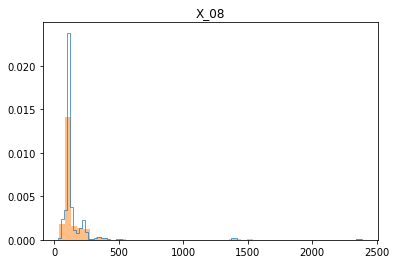

파라색이 test, 주황색이 train
               X_09          X_09
count  39608.000000  39607.000000
mean     225.199662    225.397470
std       66.266169     66.734725
min       37.580000     37.580000
25%      188.410000    188.540000
50%      234.890000    234.450000
75%      263.990000    263.960000
max      637.540000    637.490000


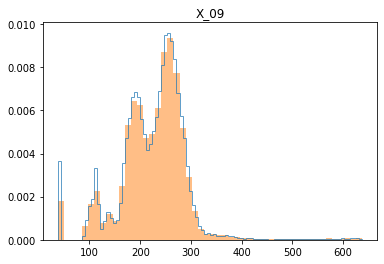

파라색이 test, 주황색이 train
               X_10          X_10
count  39608.000000  39607.000000
mean       0.002560      0.002449
std        0.088746      0.086255
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        3.500000      3.600000


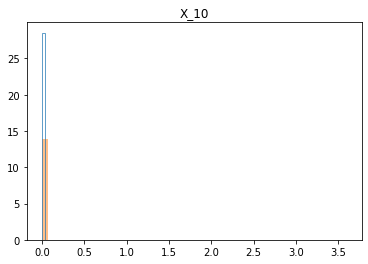

파라색이 test, 주황색이 train
               X_11          X_11
count  39608.000000  39607.000000
mean       0.000391      0.000366
std        0.014567      0.014145
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        0.600000      0.700000


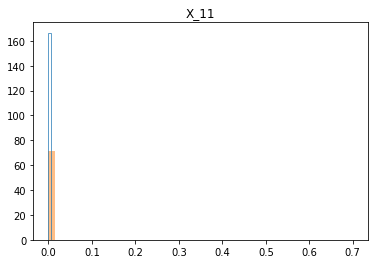

파라색이 test, 주황색이 train
               X_12          X_12
count  39608.000000  39607.000000
mean       4.373444      4.373228
std        0.021873      0.021806
min        4.290000      4.270000
25%        4.360000      4.360000
50%        4.370000      4.370000
75%        4.390000      4.390000
max        4.590000      4.490000


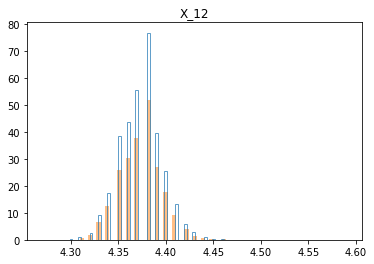

파라색이 test, 주황색이 train
               X_13          X_13
count  39608.000000  39607.000000
mean       0.143397      0.143335
std        0.025214      0.025334
min        0.050000      0.050000
25%        0.130000      0.130000
50%        0.140000      0.140000
75%        0.160000      0.160000
max        0.340000      0.280000


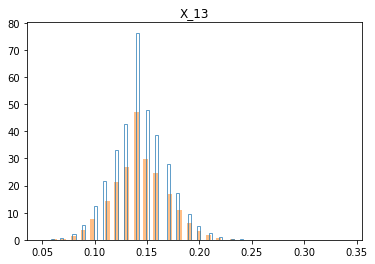

파라색이 test, 주황색이 train
               X_14          X_14
count  39608.000000  39607.000000
mean      13.372220     13.372201
std        0.029834      0.029865
min       13.080000     13.150000
25%       13.350000     13.350000
50%       13.370000     13.370000
75%       13.390000     13.390000
max       13.510000     13.490000


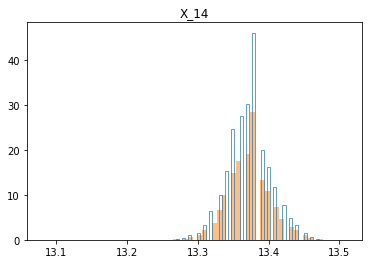

파라색이 test, 주황색이 train
               X_15          X_15
count  39608.000000  39607.000000
mean      13.381899     13.381914
std        0.029446      0.029468
min       13.190000     13.230000
25%       13.360000     13.360000
50%       13.380000     13.380000
75%       13.410000     13.410000
max       13.490000     13.500000


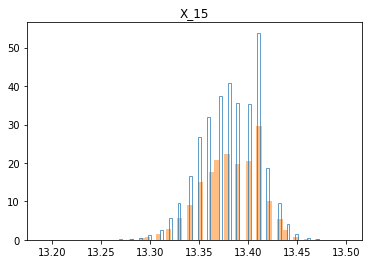

파라색이 test, 주황색이 train
               X_16          X_16
count  39608.000000  39607.000000
mean      13.464246     13.463860
std        0.036555      0.036741
min       13.150000     13.260000
25%       13.440000     13.440000
50%       13.470000     13.470000
75%       13.490000     13.490000
max       13.610000     13.610000


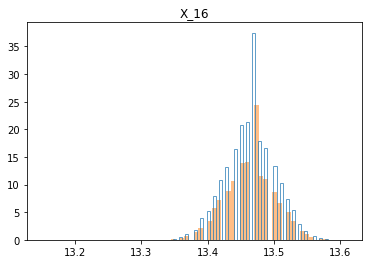

파라색이 test, 주황색이 train
               X_17          X_17
count  39608.000000  39607.000000
mean      13.512748     13.512589
std        0.023295      0.023436
min       13.400000     13.410000
25%       13.500000     13.500000
50%       13.520000     13.510000
75%       13.530000     13.530000
max       13.620000     13.610000


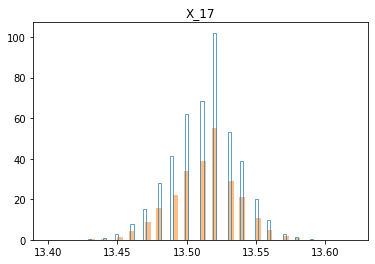

파라색이 test, 주황색이 train
               X_18          X_18
count  39608.000000  39607.000000
mean      13.449435     13.449263
std        0.029183      0.029093
min       13.230000     13.260000
25%       13.430000     13.430000
50%       13.450000     13.450000
75%       13.470000     13.470000
max       13.570000     13.570000


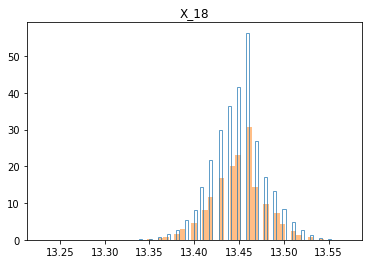

파라색이 test, 주황색이 train
               X_19          X_19
count  39608.000000  39607.000000
mean       3.238458      3.240229
std        0.109915      0.110482
min        2.890000      2.860000
25%        3.160000      3.160000
50%        3.220000      3.220000
75%        3.310000      3.310000
max        3.710000      3.750000


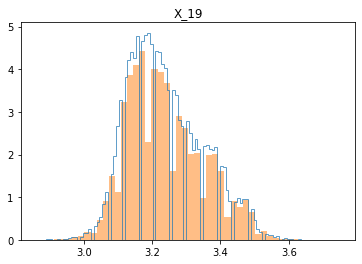

파라색이 test, 주황색이 train
               X_20          X_20
count  39608.000000  39607.000000
mean       3.183746      3.184493
std        0.105184      0.105266
min        2.830000      2.830000
25%        3.100000      3.100000
50%        3.180000      3.180000
75%        3.270000      3.270000
max        3.620000      3.670000


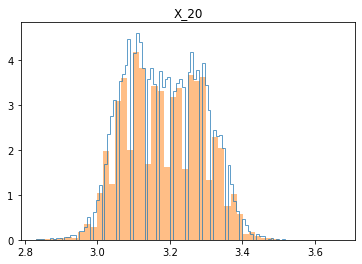

파라색이 test, 주황색이 train
               X_21          X_21
count  39608.000000  39607.000000
mean       3.172318      3.174270
std        0.106410      0.106868
min        2.840000      2.830000
25%        3.090000      3.090000
50%        3.150000      3.160000
75%        3.240000      3.250000
max        3.610000      3.680000


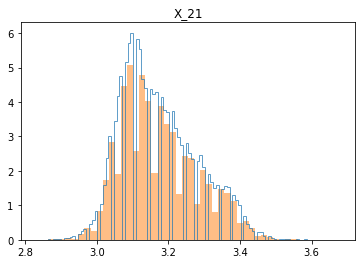

파라색이 test, 주황색이 train
               X_22          X_22
count  39608.000000  39607.000000
mean       3.232087      3.232673
std        0.108344      0.108981
min        2.850000      2.850000
25%        3.150000      3.140000
50%        3.230000      3.230000
75%        3.320000      3.320000
max        3.820000      3.790000


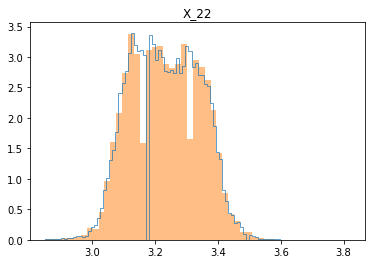

파라색이 test, 주황색이 train
          X_23     X_23
count  39608.0  39607.0
mean       1.0      1.0
std        0.0      0.0
min        1.0      1.0
25%        1.0      1.0
50%        1.0      1.0
75%        1.0      1.0
max        1.0      1.0


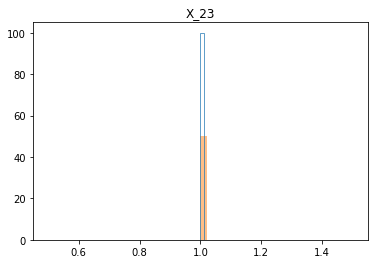

파라색이 test, 주황색이 train
               X_24          X_24
count  39608.000000  39607.000000
mean       2.115704      2.115674
std        0.032753      0.032440
min        2.000000      1.830000
25%        2.090000      2.090000
50%        2.120000      2.120000
75%        2.140000      2.140000
max        2.350000      2.350000


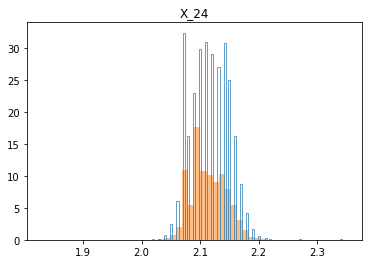

파라색이 test, 주황색이 train
               X_25          X_25
count  39608.000000  39607.000000
mean       2.093861      2.093895
std        0.032950      0.033148
min        1.970000      1.960000
25%        2.070000      2.070000
50%        2.090000      2.090000
75%        2.120000      2.120000
max        2.350000      2.350000


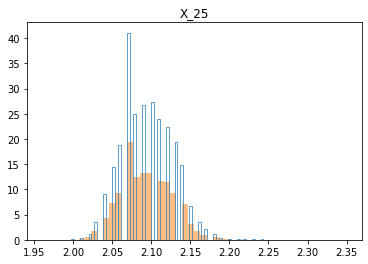

파라색이 test, 주황색이 train
               X_26          X_26
count  39608.000000  39607.000000
mean       2.090269      2.090377
std        0.038506      0.038512
min        1.960000      1.980000
25%        2.060000      2.060000
50%        2.090000      2.090000
75%        2.120000      2.120000
max        2.350000      2.350000


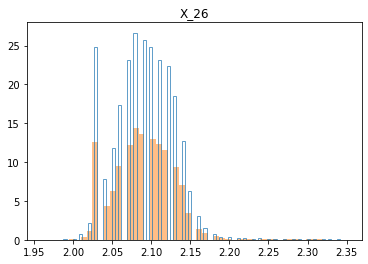

파라색이 test, 주황색이 train
               X_27          X_27
count  39608.000000  39607.000000
mean       2.098439      2.098249
std        0.038523      0.038056
min        1.880000      1.990000
25%        2.070000      2.070000
50%        2.090000      2.090000
75%        2.120000      2.120000
max        2.350000      2.350000


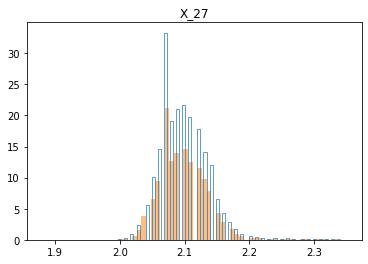

파라색이 test, 주황색이 train
               X_28          X_28
count  39608.000000  39607.000000
mean       2.118513      2.118594
std        0.042495      0.042782
min        1.990000      1.930000
25%        2.090000      2.090000
50%        2.120000      2.120000
75%        2.140000      2.140000
max        2.350000      2.350000


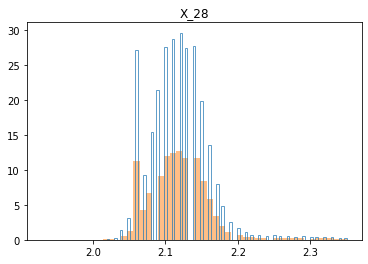

파라색이 test, 주황색이 train
               X_29          X_29
count  39608.000000  39607.000000
mean       2.173512      2.173727
std        0.046933      0.046689
min        2.040000      2.020000
25%        2.140000      2.140000
50%        2.170000      2.170000
75%        2.200000      2.200000
max        2.360000      2.360000


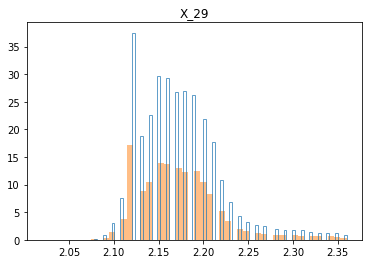

파라색이 test, 주황색이 train
               X_30          X_30
count  39608.000000  39607.000000
mean       1.378681      1.378994
std        0.029760      0.030412
min        0.570000      0.570000
25%        1.370000      1.370000
50%        1.370000      1.370000
75%        1.380000      1.380000
max        2.090000      2.110000


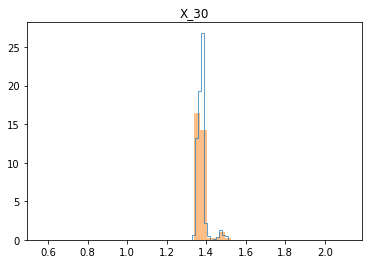

파라색이 test, 주황색이 train
               X_31          X_31
count  39608.000000  39607.000000
mean       1.571099      1.571141
std        0.075676      0.074520
min        0.600000      0.600000
25%        1.530000      1.530000
50%        1.550000      1.550000
75%        1.600000      1.600000
max        7.890000      7.210000


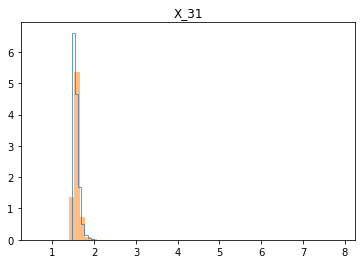

파라색이 test, 주황색이 train
               X_32          X_32
count  39608.000000  39607.000000
mean       1.362717      1.362929
std        0.028775      0.029945
min        0.570000      0.570000
25%        1.350000      1.350000
50%        1.360000      1.360000
75%        1.370000      1.370000
max        2.290000      2.450000


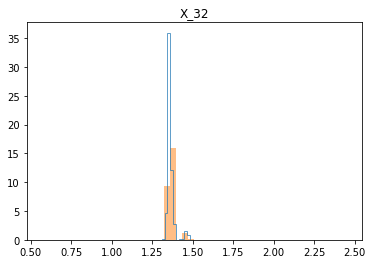

파라색이 test, 주황색이 train
               X_33          X_33
count  39608.000000  39607.000000
mean       1.596453      1.595723
std        0.129453      0.108028
min        0.610000      0.610000
25%        1.550000      1.550000
50%        1.570000      1.570000
75%        1.602500      1.610000
max        8.950000      7.810000


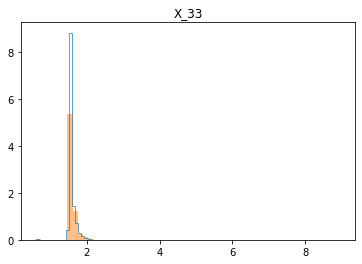

파라색이 test, 주황색이 train
               X_34          X_34
count  39608.000000  39607.000000
mean      12.950143     12.950271
std        0.044216      0.044030
min       12.840000     12.840000
25%       12.920000     12.920000
50%       12.960000     12.960000
75%       12.990000     12.990000
max       13.230000     13.080000


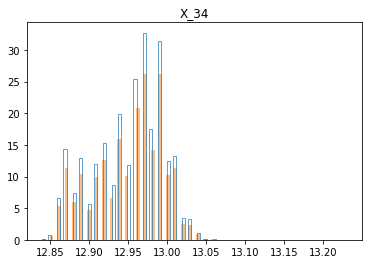

파라색이 test, 주황색이 train
               X_35          X_35
count  39608.000000  39607.000000
mean      12.920462     12.920343
std        0.052042      0.052238
min       12.810000     12.810000
25%       12.870000     12.870000
50%       12.920000     12.920000
75%       12.970000     12.970000
max       13.070000     13.090000


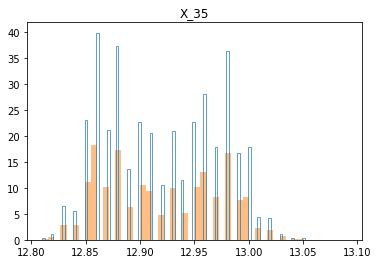

파라색이 test, 주황색이 train
               X_36          X_36
count  39608.000000  39607.000000
mean      12.941655     12.941728
std        0.048204      0.047830
min       12.840000     12.840000
25%       12.900000     12.900000
50%       12.950000     12.950000
75%       12.980000     12.980000
max       13.090000     13.090000


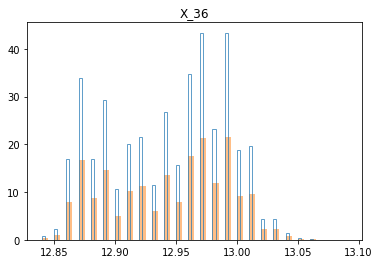

파라색이 test, 주황색이 train
               X_37          X_37
count  39608.000000  39607.000000
mean      12.919494     12.919139
std        0.052338      0.052292
min       12.810000     12.810000
25%       12.870000     12.870000
50%       12.910000     12.910000
75%       12.970000     12.970000
max       13.070000     13.080000


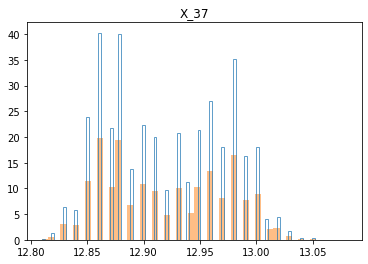

파라색이 test, 주황색이 train
               X_38          X_38
count  39608.000000  39607.000000
mean     -15.910965    -15.903737
std        0.460064      0.595420
min      -17.050000    -17.090000
25%      -16.160000    -16.160000
50%      -15.990000    -15.990000
75%      -15.750000    -15.750000
max       -2.650000     32.230000


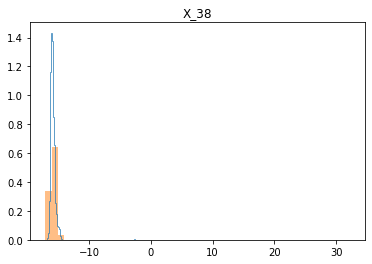

파라색이 test, 주황색이 train
               X_39          X_39
count  39608.000000  39607.000000
mean     -15.897556    -15.889576
std        0.661977      0.746665
min      -17.070000    -17.090000
25%      -16.160000    -16.160000
50%      -15.990000    -15.990000
75%      -15.750000    -15.750000
max       -2.650000     -2.650000


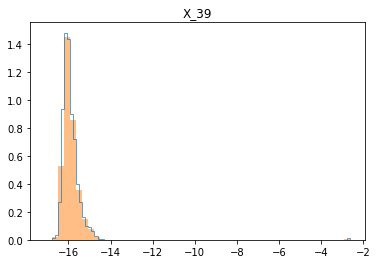

파라색이 test, 주황색이 train
               X_40          X_40
count  39608.000000  39607.000000
mean     -16.572497    -16.572162
std        0.344370      0.344486
min      -17.750000    -17.720000
25%      -16.810000    -16.810000
50%      -16.650000    -16.640000
75%      -16.400000    -16.400000
max      -14.780000    -14.800000


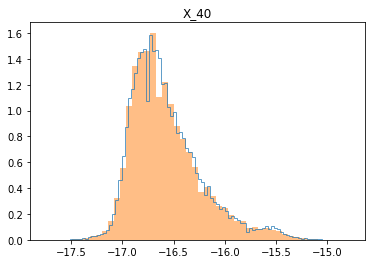

파라색이 test, 주황색이 train
               X_41          X_41
count  39608.000000  39607.000000
mean      21.187281     21.186992
std        0.030603      0.031128
min       20.810000     20.730000
25%       21.170000     21.170000
50%       21.190000     21.190000
75%       21.210000     21.210000
max       21.320000     21.620000


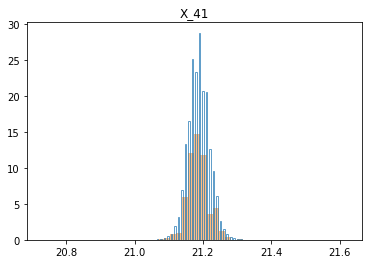

파라색이 test, 주황색이 train
               X_42          X_42
count  39608.000000  39607.000000
mean      21.059671     21.059334
std        0.040178      0.040288
min       20.880000     20.790000
25%       21.030000     21.030000
50%       21.060000     21.060000
75%       21.090000     21.090000
max       21.310000     21.440000


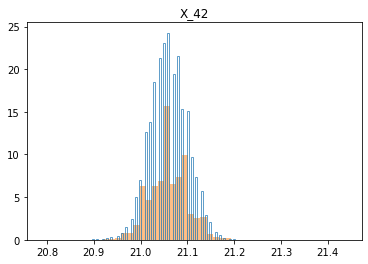

파라색이 test, 주황색이 train
               X_43          X_43
count  39608.000000  39607.000000
mean      21.204129     21.203705
std        0.047345      0.047211
min       20.870000     20.800000
25%       21.170000     21.170000
50%       21.200000     21.200000
75%       21.240000     21.240000
max       21.400000     21.410000


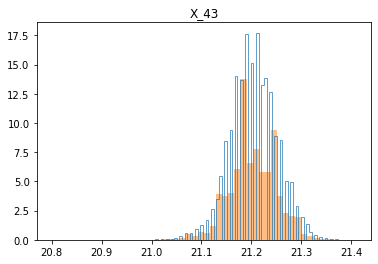

파라색이 test, 주황색이 train
               X_44          X_44
count  39608.000000  39607.000000
mean      21.160359     21.160107
std        0.042108      0.042176
min       20.950000     20.930000
25%       21.130000     21.130000
50%       21.160000     21.160000
75%       21.200000     21.190000
max       21.280000     21.320000


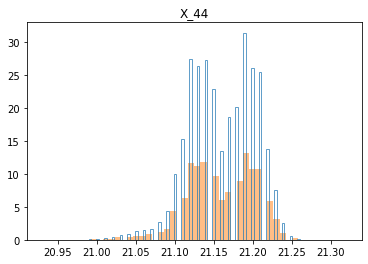

파라색이 test, 주황색이 train
               X_45          X_45
count  39608.000000  39607.000000
mean       0.154585      0.154567
std        0.047410      0.046968
min        0.010000      0.000000
25%        0.120000      0.120000
50%        0.150000      0.150000
75%        0.190000      0.190000
max        0.420000      0.420000


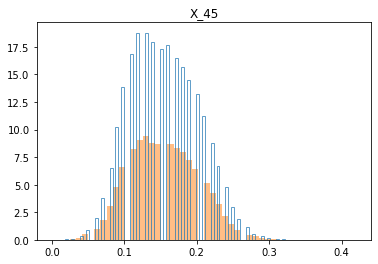

파라색이 test, 주황색이 train
               X_46          X_46
count  39608.000000  39607.000000
mean    1468.303853   1468.275305
std        2.060244      2.121517
min     1457.000000   1457.000000
25%     1469.000000   1469.000000
50%     1469.000000   1469.000000
75%     1469.000000   1469.000000
max     1469.000000   1469.000000


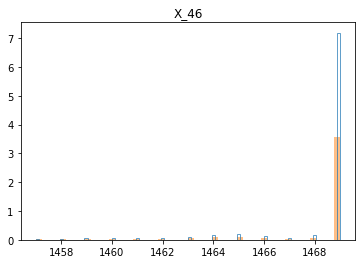

파라색이 test, 주황색이 train
          X_47     X_47
count  39608.0  39607.0
mean       1.0      1.0
std        0.0      0.0
min        1.0      1.0
25%        1.0      1.0
50%        1.0      1.0
75%        1.0      1.0
max        1.0      1.0


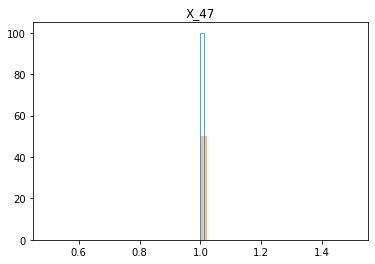

파라색이 test, 주황색이 train
          X_48     X_48
count  39608.0  39607.0
mean       1.0      1.0
std        0.0      0.0
min        1.0      1.0
25%        1.0      1.0
50%        1.0      1.0
75%        1.0      1.0
max        1.0      1.0


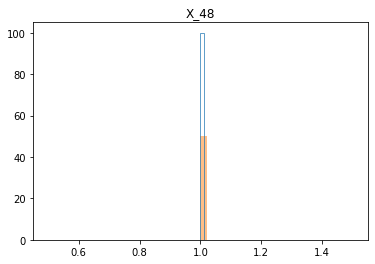

파라색이 test, 주황색이 train
                X_49           X_49
count   39608.000000   39607.000000
mean    16659.687707   16676.913639
std      8725.413782    8584.427420
min      2894.030000    3341.830000
25%     13021.355000   13093.930000
50%     15252.580000   15273.330000
75%     17540.655000   17560.180000
max    149599.930000  114563.630000


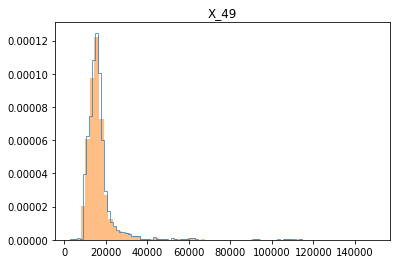

파라색이 test, 주황색이 train
               X_50          X_50
count  39608.000000  39607.000000
mean     130.792771    130.774557
std        6.283461      5.989845
min       21.800000     21.800000
25%      127.007745    126.948571
50%      130.748868    130.723378
75%      134.562718    134.538998
max      162.657956    162.619458


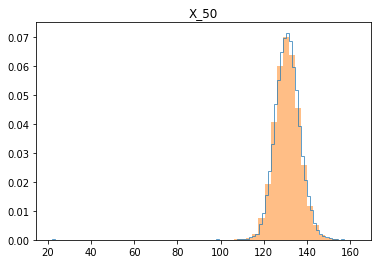

파라색이 test, 주황색이 train
               X_51          X_51
count  39608.000000  39607.000000
mean     131.506077    131.457418
std        6.248113      5.934313
min       21.910000     21.910000
25%      127.715514    127.669758
50%      131.460499    131.352856
75%      135.301195    135.170761
max      161.207806    194.513195


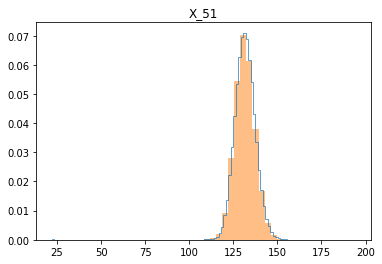

파라색이 test, 주황색이 train
               X_52          X_52
count  39608.000000  39607.000000
mean     138.619585    138.587595
std        6.711747      6.469813
min       23.100000     23.100000
25%      134.507082    134.475401
50%      138.622976    138.525575
75%      142.792608    142.702448
max      177.616739    173.438623


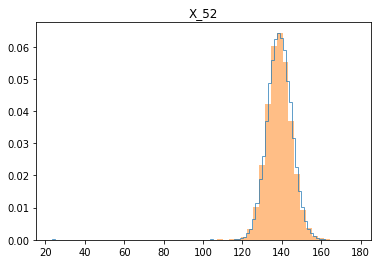

파라색이 test, 주황색이 train
               X_53          X_53
count  39608.000000  39607.000000
mean     128.012468    127.992420
std        6.022616      5.713153
min       21.330000     21.330000
25%      124.397173    124.374525
50%      128.048022    128.020010
75%      131.706045    131.618662
max      169.774016    152.406630


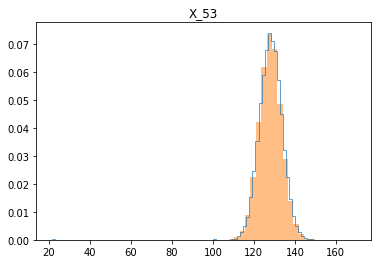

파라색이 test, 주황색이 train
               X_54          X_54
count  39608.000000  39607.000000
mean     128.024288    128.014110
std        5.783733      5.433958
min       21.340000     21.340000
25%      124.726521    124.697879
50%      128.136952    128.098728
75%      131.502206    131.487423
max      169.065281    175.052891


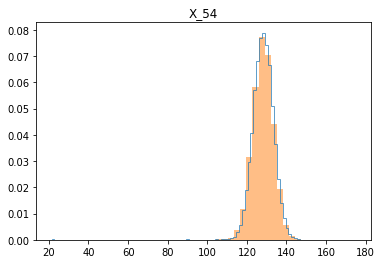

파라색이 test, 주황색이 train
               X_55          X_55
count  39608.000000  39607.000000
mean     137.897399    137.884711
std        6.825189      6.552101
min       22.980000     22.980000
25%      133.703757    133.744103
50%      137.892594    137.900952
75%      142.087140    142.073102
max      169.452855    170.155980


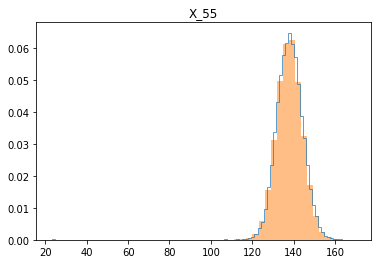

파라색이 test, 주황색이 train
               X_56          X_56
count  39608.000000  39607.000000
mean     128.479544    128.441119
std        5.766703      5.444245
min       21.410000     21.410000
25%      125.172442    125.134713
50%      128.468109    128.414501
75%      131.889357    131.839764
max      159.642590    155.277538


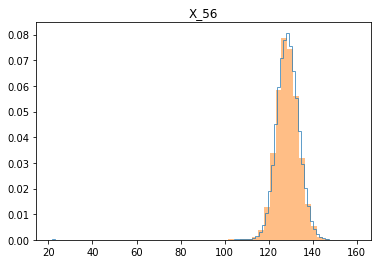

In [38]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
for i in range(1,57):
    col = "X_%02d"%i
    a = test_data[[col]]
    b = train_data[[col]]
    plt.title(col)
    print("파라색이 test, 주황색이 train")
    plt.hist(a, bins=100, density=True, alpha=0.7, histtype='step')
    plt.hist(b, bins=50, density=True, alpha=0.5, histtype='stepfilled')
    print(pd.concat([a.describe(),b.describe()],axis=1))
    plt.show()